In [1]:
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

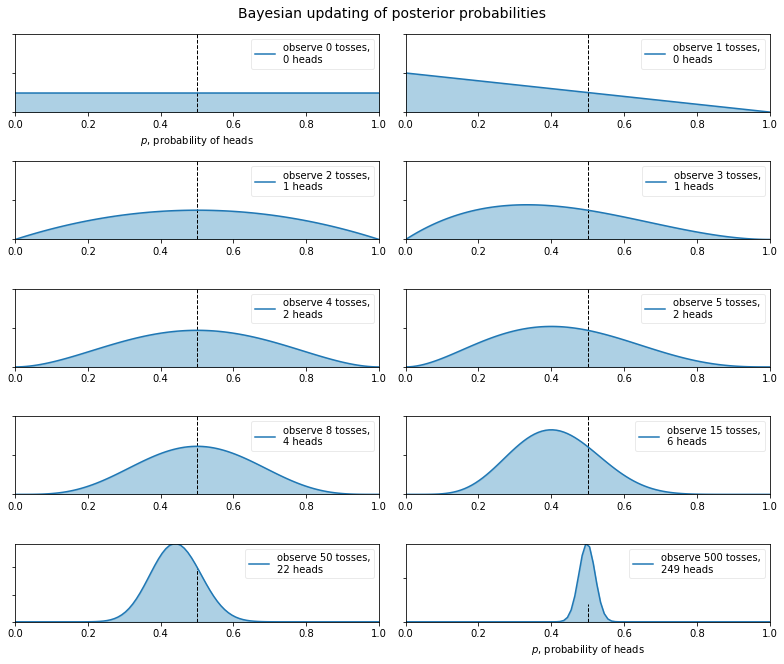

In [2]:
# shift + del
figsize(11, 9)
dist = stats.beta
n_trials = [0,1,2,3,4,5,8,15,50,500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0,1,100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel('$p$, probability of heads') if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1+heads, 1+N-heads)
    plt.plot(x,y,label='observe {} tosses,\n{} heads'.format(N, heads))
    plt.fill_between(x, 0, y, color='#348ABD', alpha=0.4)
    plt.vlines(0.5, 0, 4, color='k', linestyles='--', lw=1)
    plt.legend().get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle('Bayesian updating of posterior probabilities', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

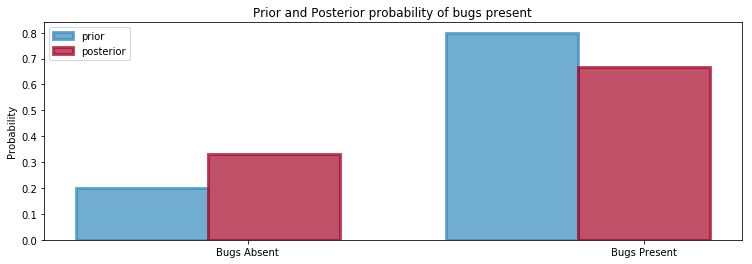

In [3]:
figsize(12.5, 4)
colours = ['#348ABD', '#A60628']

plt.bar([0, 0.7],[0.2,0.8], alpha=0.7, width=0.25, lw=3, color=colours[0], edgecolor=colours[0], label='prior')
plt.bar([0+0.25, 0.7+0.25],[1/3,2/3], alpha=0.7, width=0.25, lw=3, color=colours[1], edgecolor=colours[1], label='posterior')
plt.xticks([0.2, 0.95], ['Bugs Absent', 'Bugs Present'])
plt.title('Prior and Posterior probability of bugs present')
plt.ylabel('Probability')
plt.legend(loc='upper left')
plt.show()

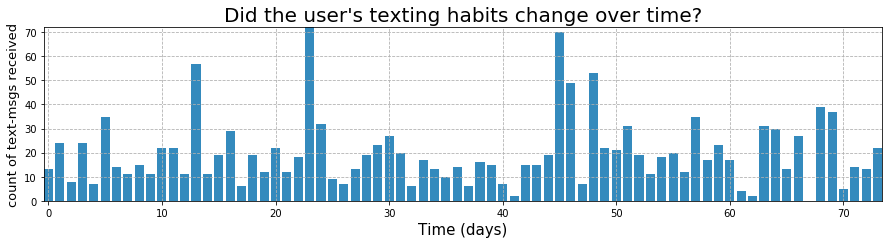

In [4]:
figsize(12.5, 3.5)
data = np.loadtxt('data.csv')
n = len(data)
plt.bar(np.arange(n), data, color='#348ABD')
plt.title("Did the user's texting habits change over time?", fontsize=20)
plt.xlabel('Time (days)', fontsize=15)
plt.ylabel('count of text-msgs received', fontsize=13)
plt.autoscale(tight=True)
plt.tight_layout()
plt.grid(linestyle='--')
plt.show()

In [9]:
alpha, sigma = 1, 1
beta = [1, 2.5]
size = 100

X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

In [14]:
import pymc3 as pm

model = pm.Model()
with model:
    a = pm.Normal('alpha', mu=0, sd=10)
    b = pm.Normal('beta', mu=0, sd=10, shape=2)
    s = pm.HalfNormal('sigma', sd=1)  

    mu = a + b[0]*X1 + b[1]*X2

    Y_obs = pm.Normal('Y_obs', mu=mu, sd=s, observed=Y)

In [15]:
map_est = pm.find_MAP(model=model, method='powell')
map_est

logp = -143.27, ||grad|| = 19.76: 100%|██████████████████████████████████████████████| 19/19 [00:00<00:00, 3155.98it/s]


In [16]:
with model:
    trace = pm.sample(500)

{'alpha': array(1.01864528),
 'beta': array([1.06497627, 2.3070663 ]),
 'sigma_log__': array(-0.10521643),
 'sigma': array(0.90012969)}